In [117]:
import pandas as pd
import nltk
import string

In [118]:
#open file
import re as rec

tweets = list()
with open('tweets5.txt', encoding="UTF-8") as f:
    for rec in f:
        splitted = rec.split('> ')
        tweets.append(splitted[1:2])
# tweets

In [119]:
#AMBIL ID, TGL, WAKTU
details = list()

with open('tweets5.txt', encoding="UTF-8") as f:
    for rec in f:
        splitted = rec.split(' ')
        details.append(splitted[:3])     
# details

In [120]:
df_details=pd.DataFrame(details)
df_details.head()

,0,1,2
0,1267689473690632192,2020-06-02,12:28:17
1,1267684590103097345,2020-06-02,12:08:53
2,1267684573426495489,2020-06-02,12:08:49
3,1267669995917414401,2020-06-02,11:10:53
4,1267665918772969472,2020-06-02,10:54:41


In [121]:
#df=pd.DataFrame(tweets,columns=['tweet'])
df_tweet = pd.DataFrame(tweets,columns=['tweet'])

In [122]:
df_tweet.head()

,tweet
0,"Betul, kesehatan dan ekonomi itu sama-sama pen..."
1,Pendidikan dan kesehatan memiliki keterkaitan ...
2,"Buat pegangan dan keperluan sehari-hari, karna..."
3,#InovasiPolriutkSemua dalam ketahanan pangan p...
4,Pentingnya Elektronik Rekam Medis untuk pelaya...


## CLEANING

In [123]:
# BERSIHKAN karakter
import re
def cleanTxt(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'https[A-Za-z0-9]', '', text)
    text = re.sub(r'http[A-Za-z0-9]', '', text)
    text = re.sub(r'pictwitter[A-Za-z0-9]', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
df_tweet["tweet"] = df_tweet["tweet"].apply(cleanTxt)

In [124]:
# HAPUS EMOJI
def cleanEmot_1(text):
  # Ref: https://gist.github.com/Alex-Just/e86110836f3f93fe7932290526529cd1#gistcomment-3208085
  # Ref: https://en.wikipedia.org/wiki/Unicode_block
  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  text = re.sub(EMOJI_PATTERN, r' \1 ', text)
  return text

df_tweet["tweet"] = df_tweet["tweet"].apply(cleanEmot_1)
# df_tweet.head()

In [125]:
def cleanEmot_2(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    hasil = emoji_pattern.sub(r'', text)
    return hasil
df_tweet["tweet"] = df_tweet["tweet"].apply(cleanEmot_2)
# df_tweet.head()

In [126]:
df_tweet.head()

,tweet
0,betul kesehatan dan ekonomi itu samasama penti...
1,pendidikan dan kesehatan memiliki keterkaitan ...
2,buat pegangan dan keperluan seharihari karna k...
3,inovasipolriutksemua dalam ketahanan pangan pa...
4,pentingnya elektronik rekam medis untuk pelaya...


In [127]:
#HAPUS DUPLIKAT DATA
df_tweet.drop_duplicates(subset='tweet',keep = False, inplace = True) 
df_tweet.head()

,tweet
0,betul kesehatan dan ekonomi itu samasama penti...
1,pendidikan dan kesehatan memiliki keterkaitan ...
2,buat pegangan dan keperluan seharihari karna k...
3,inovasipolriutksemua dalam ketahanan pangan pa...
4,pentingnya elektronik rekam medis untuk pelaya...


In [128]:
df_tweet.to_excel("clean_data.xlsx", sheet_name='satu')

In [129]:
# df_tweet['tweet'].str.lower().str.split()
df_tweet.head()

,tweet
0,betul kesehatan dan ekonomi itu samasama penti...
1,pendidikan dan kesehatan memiliki keterkaitan ...
2,buat pegangan dan keperluan seharihari karna k...
3,inovasipolriutksemua dalam ketahanan pangan pa...
4,pentingnya elektronik rekam medis untuk pelaya...


# NLTK

In [134]:
import nltk
from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import word_tokenize
global df_token

In [135]:
# tt = TweetTokenizer()
tt = TweetTokenizer()
hasil_token = df_tweet['tweet'].apply(tt.tokenize)
# df_token = pd.DataFrame(hasil_token)

In [136]:
df_tweet['tokenized'] = df_tweet['tweet'].apply(tt.tokenize)
df_tweet.head()

,tweet,tokenized
0,betul kesehatan dan ekonomi itu samasama penti...,"[betul, kesehatan, dan, ekonomi, itu, samasama..."
1,pendidikan dan kesehatan memiliki keterkaitan ...,"[pendidikan, dan, kesehatan, memiliki, keterka..."
2,buat pegangan dan keperluan seharihari karna k...,"[buat, pegangan, dan, keperluan, seharihari, k..."
3,inovasipolriutksemua dalam ketahanan pangan pa...,"[inovasipolriutksemua, dalam, ketahanan, panga..."
4,pentingnya elektronik rekam medis untuk pelaya...,"[pentingnya, elektronik, rekam, medis, untuk, ..."


## STOPWORD REMOVAL

In [137]:
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'ya', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt'])

list_stopwords = set(list_stopwords)

In [138]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_tweet['tweet_stopword'] = df_tweet['tokenized'].apply(stopwords_removal) 

# print(df_tweet['tweet_stopword'])

## HASIL STOPWORD

In [139]:
df_tweet.head()

,tweet,tokenized,tweet_stopword
0,betul kesehatan dan ekonomi itu samasama penti...,"[betul, kesehatan, dan, ekonomi, itu, samasama...","[kesehatan, ekonomi, samasama]"
1,pendidikan dan kesehatan memiliki keterkaitan ...,"[pendidikan, dan, kesehatan, memiliki, keterka...","[pendidikan, kesehatan, memiliki, keterkaitan,..."
2,buat pegangan dan keperluan seharihari karna k...,"[buat, pegangan, dan, keperluan, seharihari, k...","[pegangan, keperluan, seharihari, karna, kulon..."
3,inovasipolriutksemua dalam ketahanan pangan pa...,"[inovasipolriutksemua, dalam, ketahanan, panga...","[inovasipolriutksemua, ketahanan, pangan, patu..."
4,pentingnya elektronik rekam medis untuk pelaya...,"[pentingnya, elektronik, rekam, medis, untuk, ...","[elektronik, rekam, medis, pelayanan, kesehata..."


In [140]:
df_tweet.to_excel("clean_data.xlsx")

In [143]:
df_new= df_tweet.copy()
df_new.head()
# df_new.to_csv("new.csv")

,tweet,tokenized,tweet_stopword
0,betul kesehatan dan ekonomi itu samasama penti...,"[betul, kesehatan, dan, ekonomi, itu, samasama...","[kesehatan, ekonomi, samasama]"
1,pendidikan dan kesehatan memiliki keterkaitan ...,"[pendidikan, dan, kesehatan, memiliki, keterka...","[pendidikan, kesehatan, memiliki, keterkaitan,..."
2,buat pegangan dan keperluan seharihari karna k...,"[buat, pegangan, dan, keperluan, seharihari, k...","[pegangan, keperluan, seharihari, karna, kulon..."
3,inovasipolriutksemua dalam ketahanan pangan pa...,"[inovasipolriutksemua, dalam, ketahanan, panga...","[inovasipolriutksemua, ketahanan, pangan, patu..."
4,pentingnya elektronik rekam medis untuk pelaya...,"[pentingnya, elektronik, rekam, medis, untuk, ...","[elektronik, rekam, medis, pelayanan, kesehata..."


## STEMMING SASTRAWI

In [52]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #untuk stemmmer sastrawi
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [144]:
tweet = df_tweet['tweet_stopword'].tolist()
tweet

[['kesehatan', 'ekonomi', 'samasama'],
 ['pendidikan',
  'kesehatan',
  'memiliki',
  'keterkaitan',
  'erat',
  'kesehatan',
  'mendukung',
  'keberhasilan',
  'pembelajaran',
  'bangsa',
  'berpendidikan',
  'sadar',
  'kesehatan'],
 ['pegangan',
  'keperluan',
  'seharihari',
  'karna',
  'kulon',
  'dikasi',
  'uang',
  'jajan',
  'harapan',
  'semoga',
  'semoga',
  'masyarakat',
  'indonesia',
  'paham',
  'kesehatan',
  'kebersihan',
  'taat',
  'peraturan',
  'pemerintah'],
 ['inovasipolriutksemua',
  'ketahanan',
  'pangan',
  'patut',
  'apresiasi',
  'dukungan',
  'guys',
  'menjaga',
  'gizi',
  'asupan',
  'dampak',
  'kesehatan'],
 ['elektronik',
  'rekam',
  'medis',
  'pelayanan',
  'kesehatan',
  'klinik',
  'omodfcgjdkfq'],
 ['tatanan',
  'kehidupan',
  'seharihari',
  'masyarakat',
  'new',
  'normal',
  'anggota',
  'polsek',
  'simpang',
  'katis',
  'mengedukasi',
  'masyarakat',
  'menerapkan',
  'protokol',
  'kesehatan',
  'pencegahan',
  'penyebaran',
  'virus

In [145]:
#BERUBAHAN BENTUK KATA KE BENTUK DASAR(HILANGKAN IMBUHAN)
def stemmed(stop: list):    
    #STEMMING menggunakan stemmer sastrawi
    hasilStemming = []
    for i in range(len(tweet)):
        s = list()
        for j in range(len(tweet[i])):
            ss = stemmer.stem(tweet[i][j])
            s.append(ss)
        hasilStemming.append(s)
    dfStemmed = pd.DataFrame(hasilStemming)
    return (hasilStemming)

In [146]:
wc = stemmed(tweet)
wc

[['sehat', 'ekonomi', 'samasama'],
 ['didik',
  'sehat',
  'milik',
  'kait',
  'erat',
  'sehat',
  'dukung',
  'hasil',
  'ajar',
  'bangsa',
  'didik',
  'sadar',
  'sehat'],
 ['pegang',
  'perlu',
  'seharihari',
  'karna',
  'kulon',
  'kasi',
  'uang',
  'jajan',
  'harap',
  'moga',
  'moga',
  'masyarakat',
  'indonesia',
  'paham',
  'sehat',
  'bersih',
  'taat',
  'atur',
  'perintah'],
 ['inovasipolriutksemua',
  'tahan',
  'pangan',
  'patut',
  'apresiasi',
  'dukung',
  'guys',
  'jaga',
  'gizi',
  'asupan',
  'dampak',
  'sehat'],
 ['elektronik', 'rekam', 'medis', 'layan', 'sehat', 'klinik', 'omodfcgjdkfq'],
 ['tatanan',
  'hidup',
  'seharihari',
  'masyarakat',
  'new',
  'normal',
  'anggota',
  'polsek',
  'simpang',
  'katis',
  'edukasi',
  'masyarakat',
  'terap',
  'protokol',
  'sehat',
  'cegah',
  'sebar',
  'virus',
  'humaspolseksimpangkatis',
  'polresbangkatengah',
  'poldababel'],
 ['tambah',
  'bang',
  'tega',
  'bagus',
  'masyarakat',
  'masker',
  

## WORD COUNT

In [147]:
# MENGHITUNG FREKUENSI KEMUNUCULAN KATA
from collections import defaultdict
def bobot(stemmed: list):
        merge = []
        for i in range (len(stemmed)):
            for j in range (len(stemmed[i])):
                merge.append(stemmed[i][j])
        
        daftar = list(dict.fromkeys(merge))
        rawTF = defaultdict(dict)
        
        for key in daftar:
            for val in range(len(stemmed)):
                count = 0
                for i in range(len(stemmed[val])):
                    if(key == stemmed[val][i]):
                        count += 1
                rawTF[key][val] = count
        rawTF = pd.DataFrame(rawTF)
        return rawTF

In [159]:
sum_word = bobot(wc).sum()
df_sum = pd.DataFrame(sum_word)
df_sum

,0
sehat,6296
ekonomi,97
samasama,13
didik,158
milik,108
kait,93
erat,4
dukung,70
hasil,41
ajar,258


In [149]:
df_sum_sort = df_sum.sort_values([0], ascending=False)
df_sum_sort.head()

,0
sehat,6296
jaga,1468
sadar,1143
mental,1079
masyarakat,689


In [150]:
df_sum_sort.to_excel("word_count.xlsx", sheet_name='satu')

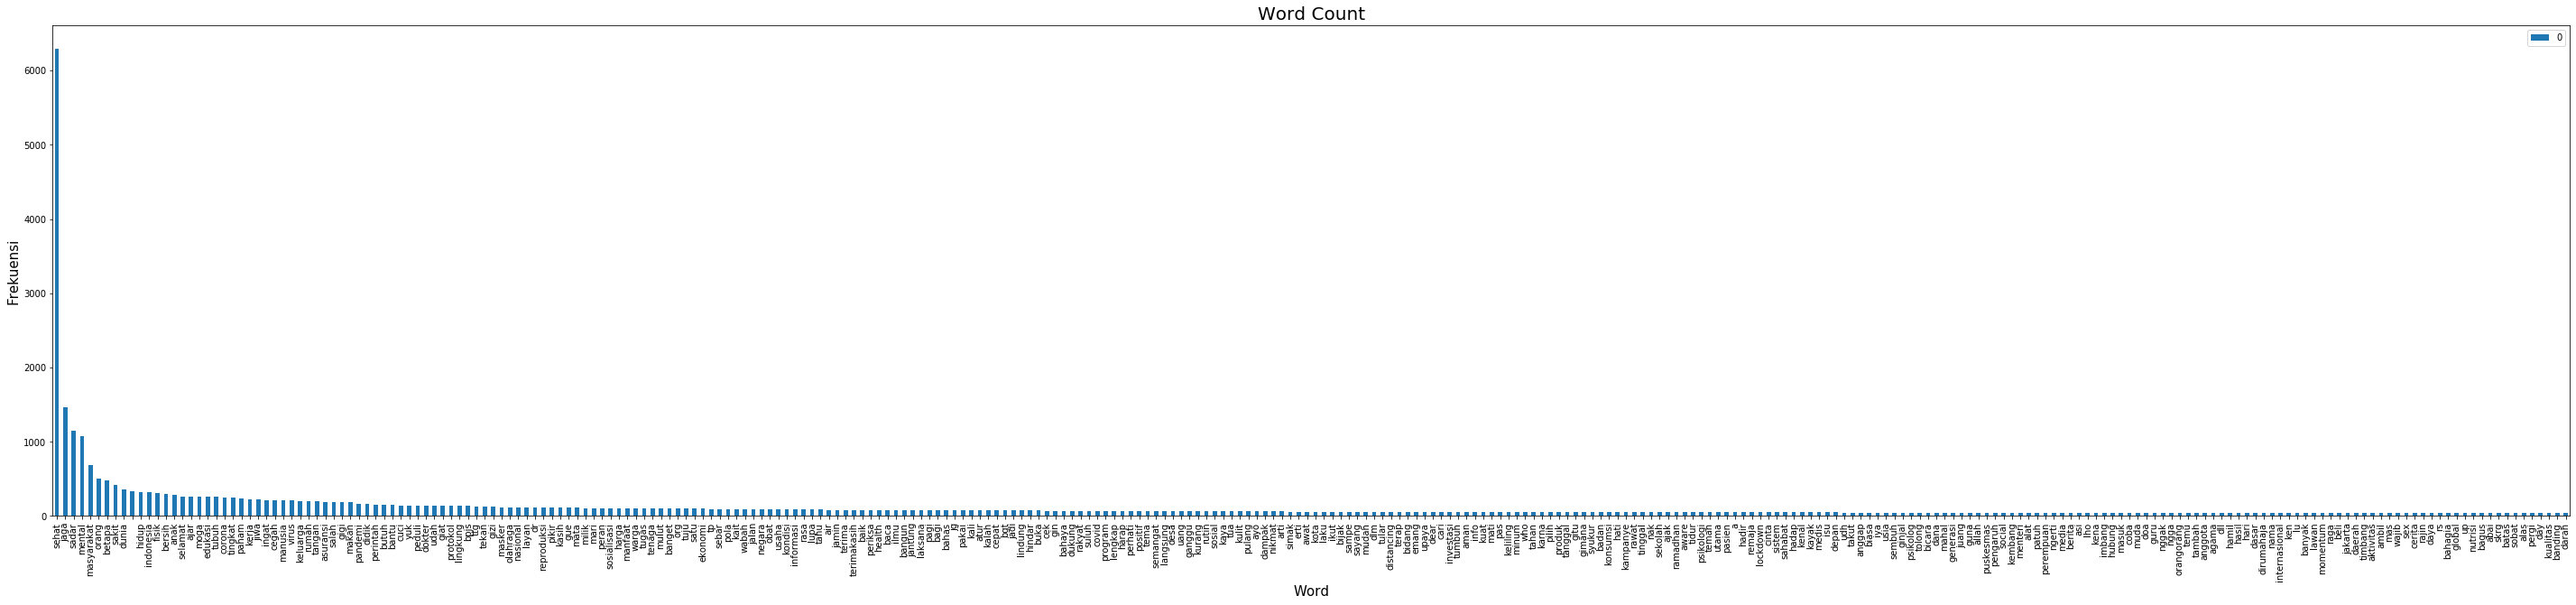

In [157]:
import matplotlib.pyplot as plt
tes = df_sum_sort[:300] #show 300 data teratas
tes.plot.bar(figsize=(50,10))
plt.title('Word Count', size=20)
plt.xlabel('Word', size=15)
plt.ylabel('Frekuensi', size=15)
plt.show()